3. Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the
data and calculate the following

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

a. Measure the dispersion in both and interpret the results.

b. Calculate mean and 5% confidence interval and plot it in a graph

c. Calculate the Mean absolute deviation and Standard deviation and interpret
the results.

d. Calculate the correlation coefficient and check the significance of it at 1% level
of significance.


In [21]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns 

In [12]:
df_BP=pd.read_csv(r"D:\ML\blood_pressure.csv")
df_BP

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


#### Measure the dispersion in both and interpret the results.


In [22]:
# dispersion in Blood Pressure Before (mmHg)
max_value_bp_before= max(df_BP[' Blood Pressure Before (mmHg)'])
min_value_bp_before=min(df_BP[' Blood Pressure Before (mmHg)'])
range_BP_before = max(df_BP[' Blood Pressure Before (mmHg)'])-min(df_BP[' Blood Pressure Before (mmHg)'])
print(f" range is {range_BP_before} and max_value is {max_value_bp_before} and min value is {min_value_bp_before}")

 range is 28 and max_value is 148 and min value is 120


In [23]:
max_value_bp_after= max(df_BP[' Blood Pressure After (mmHg)'])
min_value_bp_after=min(df_BP[' Blood Pressure After (mmHg)'])
range_BP_after=max(df_BP[' Blood Pressure After (mmHg)'])-min(df_BP[' Blood Pressure After (mmHg)'])
print(f" range is {range_BP_after} and max_value is {max_value_bp_after} and min value is {min_value_bp_after}")

 range is 23 and max_value is 141 and min value is 118


##### Interpretation of the results above 



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Blood Pressure After (mmHg)'>

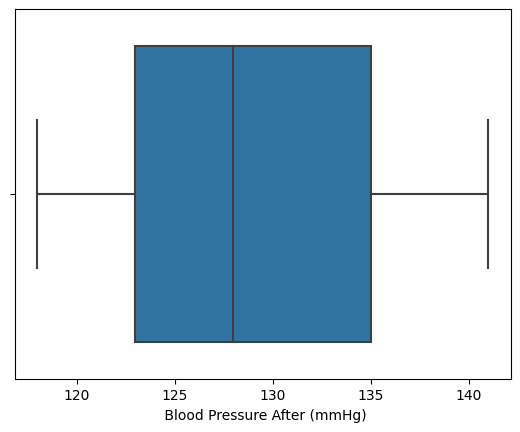

In [24]:
sns.boxplot(df_BP[' Blood Pressure After (mmHg)'])

#interpretation : data doesn't have outliers and seems to be a little skewed towards the right and median falls left of mean, data is right skewed.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Blood Pressure Before (mmHg)'>

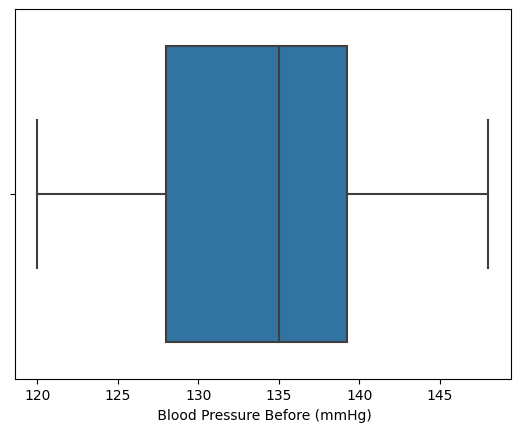

In [25]:
sns.boxplot(df_BP[' Blood Pressure Before (mmHg)'])
#interpretation: data doesn't have outliers, median falls to the right of mean as observed from the data, so data is left skewed.

In [15]:
# b. Calculate mean and 5% confidence interval and plot it in a graph
mean_bp_after=df_BP[' Blood Pressure After (mmHg)'].mean()
stdev_bp_after=df_BP[' Blood Pressure After (mmHg)'].std()
std_error =stdev_bp_after/np.sqrt(len(df_BP[' Blood Pressure After (mmHg)']))
alpha =0.05 

dof=len(df_BP[' Blood Pressure After (mmHg)']) -1

critical_value_or_z= stats.norm.ppf(1-alpha/2)

# margin of error 
margin_of_Error= critical_value_or_z*std_error

# confidence interval 
lower_bound= mean_bp_after - margin_of_Error
upper_bound= mean_bp_after + margin_of_Error 

#interval formed =
print(f"Point estimate around mean is given by  {lower_bound}< mean < {upper_bound}")


Point estimate around mean is given by  127.00997247543387< mean < 129.71002752456616


In [16]:
print(f"critical_value or z_Score is {critical_value_or_z}") 


critical_value or z_Score is 1.959963984540054


<ErrorbarContainer object of 3 artists>

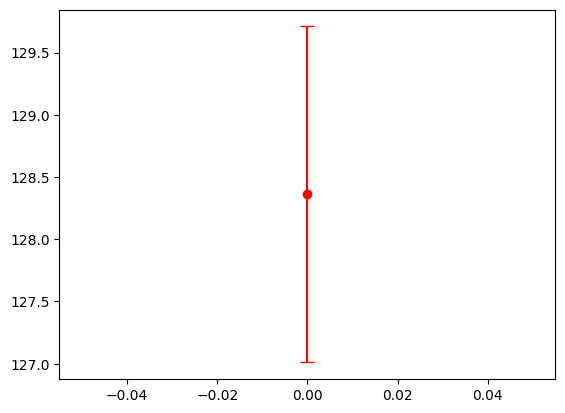

In [17]:
#printing it on graph 
import matplotlib.pyplot as plt

plt.errorbar(0, mean_bp_after, yerr= margin_of_Error, fmt='o', color='red', capsize=5, label='Mean with 5% CI')

#### Calculate the Mean absolute deviation and Standard deviation and interpret the results.

In [18]:
mean_abs_bp_after=stats.median_abs_deviation(df_BP[' Blood Pressure After (mmHg)'])
print(f" mean absolute deviation is {mean_abs_bp_after} and std deviation is {stdev_bp_after}")

 mean absolute deviation is 6.0 and std deviation is 6.888022102523226


The MAD describes what the expected deviation is whereas the STD is a bit more abstract. The usual example given concerns finding 68% of observations within 1 STD, 95% within 2 STD etc — but this is just the special case of the Normal Distribution.

Whilst it is true that STD can be used to give bounds like this for many more (finite mean and variance) distributions due to Chebyshev’s Inequality, the point remains that STD gains its informational content from knowing the distribution of the data — which is quite an assumption to assert in the real world. 

### Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [20]:
corr_coeff, p_value = stats.pearsonr(df_BP[' Blood Pressure After (mmHg)'], df_BP[' Blood Pressure Before (mmHg)'])
print(f'correlation coeff and p value are {corr_coeff} and {p_value}')

# Calculate critical value for 1% significance level
alpha_2 = 0.01
# 1-aplha/2 taken because we are considering the confidence interval which needs a lower bound and a upper bound so a two tailed test can give this result
critical_value = stats.norm.ppf(1-alpha_2/2)


# Checking significance of correlation coefficient
if np.abs(corr_coeff) > critical_value:
    significance = "significant"
else:
    significance = "not significant"

print(f"The correlation coefficient is {significance} at the {alpha_2*100}% level of significance.")

correlation coeff and p value are 0.9779485966556021 and 1.8097381433059708e-68
The correlation coefficient is not significant at the 1.0% level of significance.
